In [1]:
import sys
sys.path.insert(0, 'pipeline_code')
from mixed_data import create_pipeline
import pandas as pd

In [2]:
file = pd.read_csv("datasets/Titanic-Dataset.csv")
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
from sklearn.model_selection import train_test_split

data, labels = file.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Survived"]), file.Survived.astype("str").astype("category")
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0, stratify=labels)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((712, 7), (179, 7), (712,), (179,))

In [4]:
for column in train_data.columns:
    if train_data[column].dtype == "object":
        train_data[column] = train_data[column].astype("category")

train_data.Pclass = train_data.Pclass.astype("category")
train_data.SibSp = train_data.SibSp.astype("category")
train_data.Parch = train_data.Parch.astype("category")

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 502 to 80
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    category
 1   Sex       712 non-null    category
 2   Age       566 non-null    float64 
 3   SibSp     712 non-null    category
 4   Parch     712 non-null    category
 5   Fare      712 non-null    float64 
 6   Embarked  710 non-null    category
dtypes: category(5), float64(2)
memory usage: 21.2 KB


In [5]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

param_grid_RandomForest = {
    "feature_selector__k": range(1, 7),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__estimator__max_depth": range(2, 8),
    "model__estimator__criterion": ["gini", "entropy"],
}

param_grid_KNNeighbor = {
    "feature_selector__k": range(1, 7),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__n_neighbors": range(3, 18, 2),
}

param_grid_AdaBoostGNB = {
    "feature_selector__k": range(1, 7),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__learning_rate": [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
}

param_grid_NeuralNetwork = {
    "feature_selector__k": range(1, 7),

    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__hidden_layer_sizes": [(32,), (32, 32, ), (64,), (64, 64, )],
    "model__activation": ["relu", "logistic"],
    "model__learning_rate": ['adaptive', 'constant']
}

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.preprocessing import RobustScaler

clf_RandomForest = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="RandomForestClf"
    )

clf_KNNeighbor = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="KNNClf"
    )

clf_AdaBoostGNB = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="AdaBoostGaussianNB"
    )

clf_NeuralNetwork = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="NeuralNetworkClf"
    )

In [8]:
clf_NeuralNetwork

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, object): ['0', '1'])),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomSimpleImputer(train_labels=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, object): ['0', '1']))]),
                                                  ['Sex', 'Embarked', 'Pclass',
                                                   'SibSp', 'Parch'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('oversampler', SMOTE_ENC(sampling_strategy='minority')),
                ('encoder', DynamicColumnEncoder()),
                ('model', MLPClassifier(random_state=0))])

In [9]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scorer = "f1_macro"

Random Forest best parameters: {'oversampler__k_neighbors': 9, 'oversampler__borderline': False, 'model__estimator__max_depth': 6, 'model__estimator__criterion': 'gini', 'feature_selector__k': 3}
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.85      0.79      0.81        28

    accuracy                           0.86        72
   macro avg       0.86      0.85      0.85        72
weighted avg       0.86      0.86      0.86        72

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.89      0.86      0.87        28

    accuracy                           0.90        72
   macro avg       0.90      0.89      0.90        72
weighted avg       0.90      0.90      0.90        72

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.91      0.78      0.

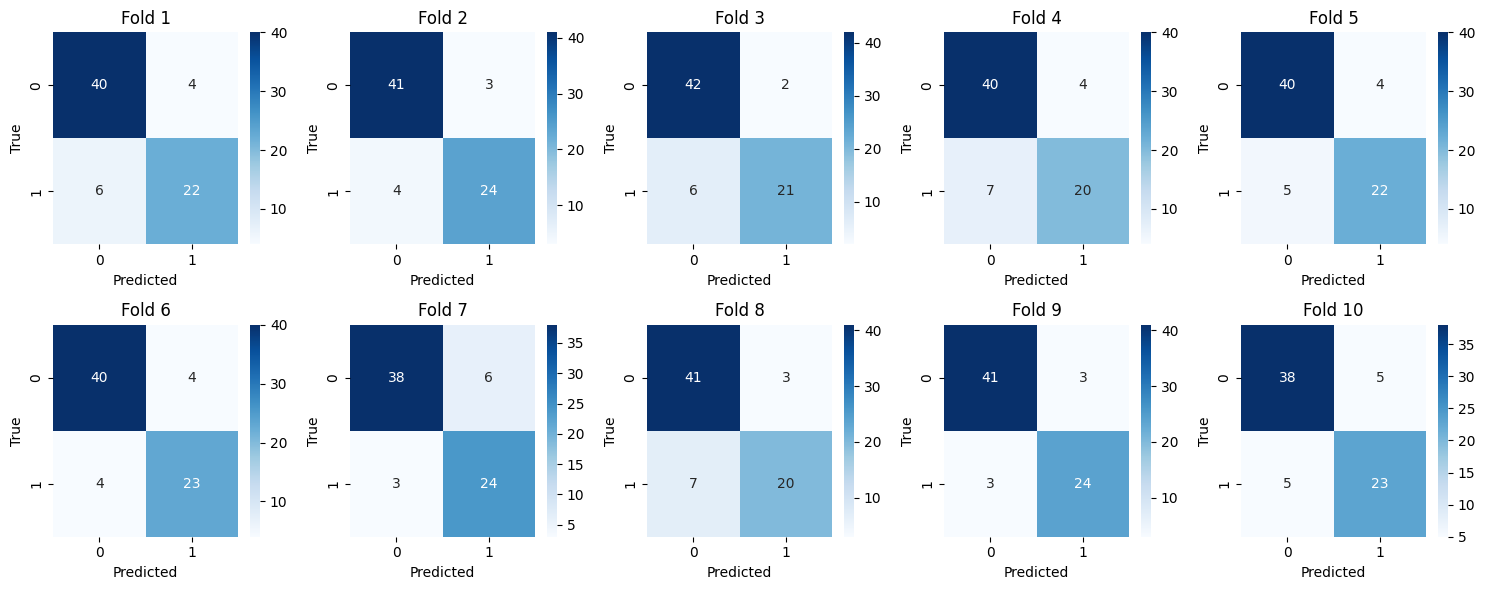

In [10]:
clfrf = RandomizedSearchCV(
    estimator = clf_RandomForest, 
    param_distributions=param_grid_RandomForest,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfrf.fit(train_data, train_labels)

best_params = clfrf.best_params_
print("Random Forest best parameters:", best_params)

f_macro_scores1 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfrf.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores1.append(report["macro avg"]["f1-score"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

KNN best parameters: {'oversampler__k_neighbors': 3, 'oversampler__borderline': False, 'model__n_neighbors': 15, 'feature_selector__k': 5}
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.71      0.79      0.75        28

    accuracy                           0.79        72
   macro avg       0.78      0.79      0.78        72
weighted avg       0.80      0.79      0.79        72

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        44
           1       0.65      0.86      0.74        28

    accuracy                           0.76        72
   macro avg       0.77      0.78      0.76        72
weighted avg       0.79      0.76      0.77        72

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        44
           1       0.77      0.89      0.83        27

    accuracy                           0.86

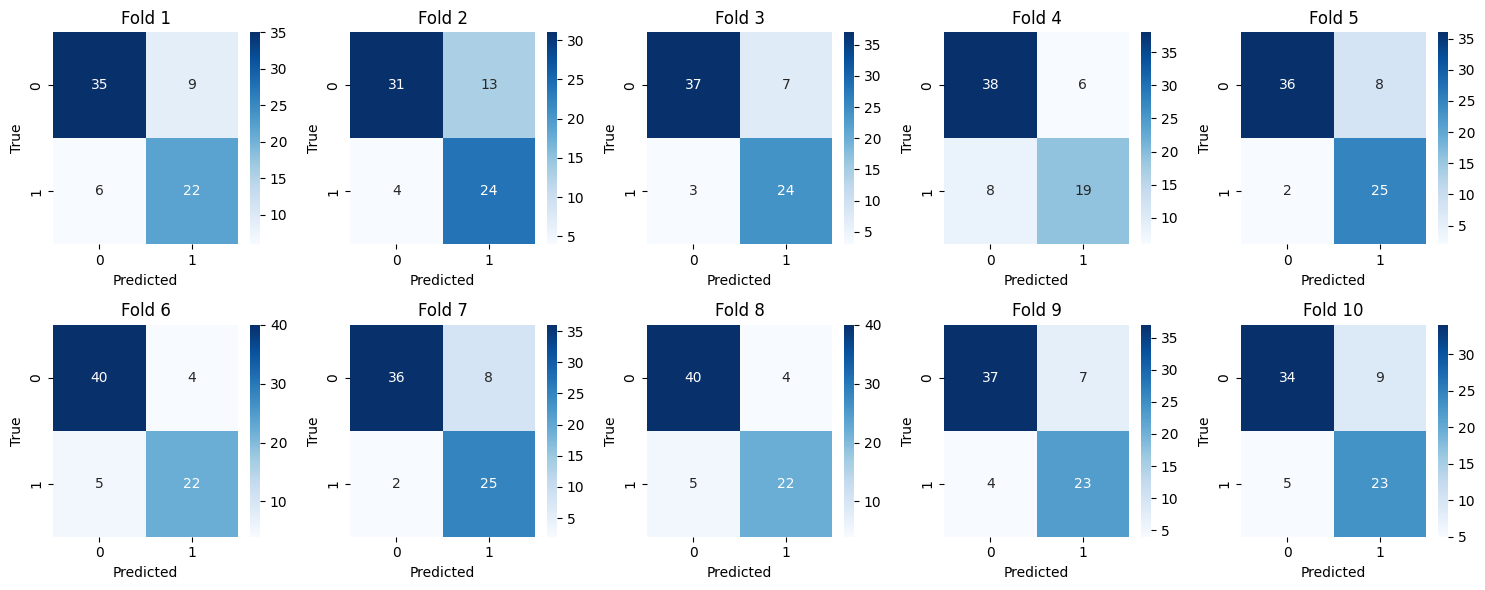

In [11]:
clfknn = RandomizedSearchCV(
    estimator = clf_KNNeighbor, 
    param_distributions=param_grid_KNNeighbor,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfknn.fit(train_data, train_labels)

best_params = clfknn.best_params_
print("KNN best parameters:", best_params)

f_macro_scores2 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfknn.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores2.append(report["macro avg"]["f1-score"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

AdaBoost best parameters: {'oversampler__k_neighbors': 3, 'oversampler__borderline': False, 'model__learning_rate': 1.4, 'feature_selector__k': 1}
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.67      0.57      0.62        28

    accuracy                           0.72        72
   macro avg       0.71      0.69      0.70        72
weighted avg       0.72      0.72      0.72        72

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.80      0.71      0.75        28

    accuracy                           0.82        72
   macro avg       0.81      0.80      0.81        72
weighted avg       0.82      0.82      0.82        72

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.73      0.70      0.72        27

    accuracy                       

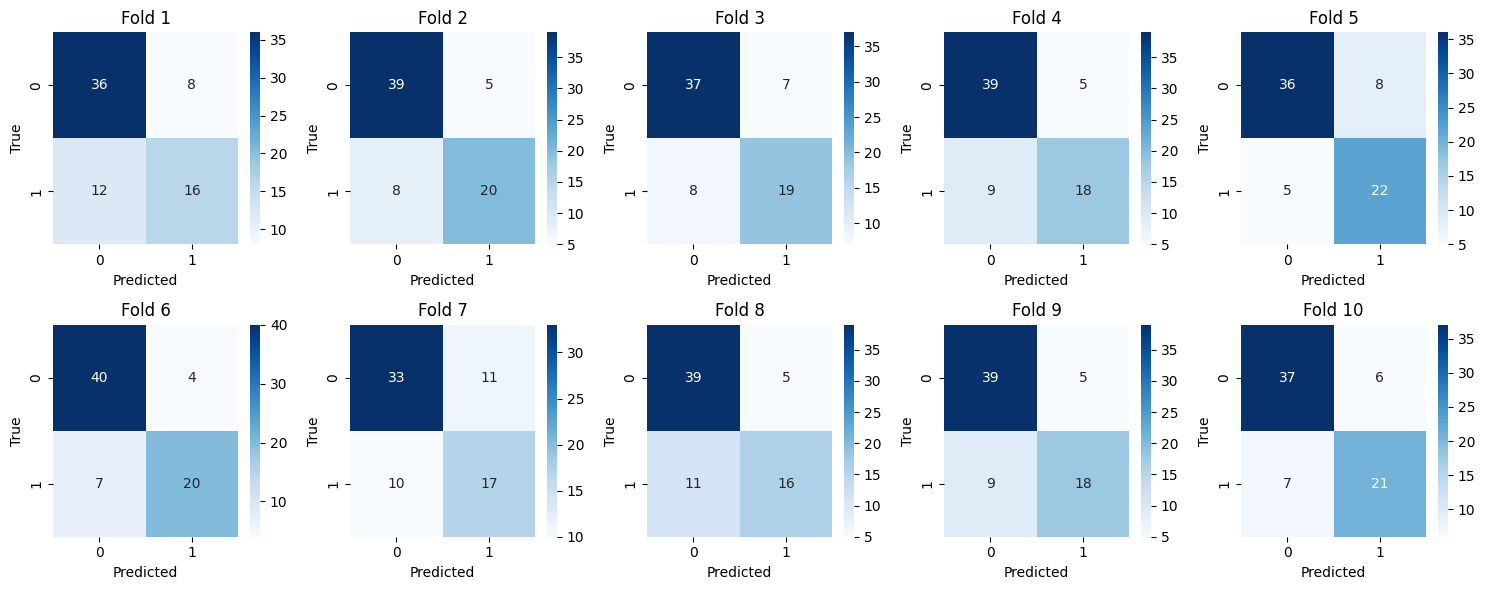

In [12]:
clfadagnb = RandomizedSearchCV(
    estimator = clf_AdaBoostGNB, 
    param_distributions=param_grid_AdaBoostGNB,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfadagnb.fit(train_data, train_labels)

best_params = clfadagnb.best_params_
print("AdaBoost best parameters:", best_params)

f_macro_scores3 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfadagnb.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores3.append(report["macro avg"]["f1-score"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan 0.77319189 0.77319189 0.77319189        nan 0.77319189
        nan        nan        nan 0.75539227]
  warnings.warn(


NeuralNetwork best parameters: {'oversampler__k_neighbors': 7, 'oversampler__borderline': True, 'model__learning_rate': 'constant', 'model__hidden_layer_sizes': (64, 64), 'model__activation': 'logistic', 'feature_selector__k': 1}
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.67      0.57      0.62        28

    accuracy                           0.72        72
   macro avg       0.71      0.69      0.70        72
weighted avg       0.72      0.72      0.72        72

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.80      0.71      0.75        28

    accuracy                           0.82        72
   macro avg       0.81      0.80      0.81        72
weighted avg       0.82      0.82      0.82        72

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
       

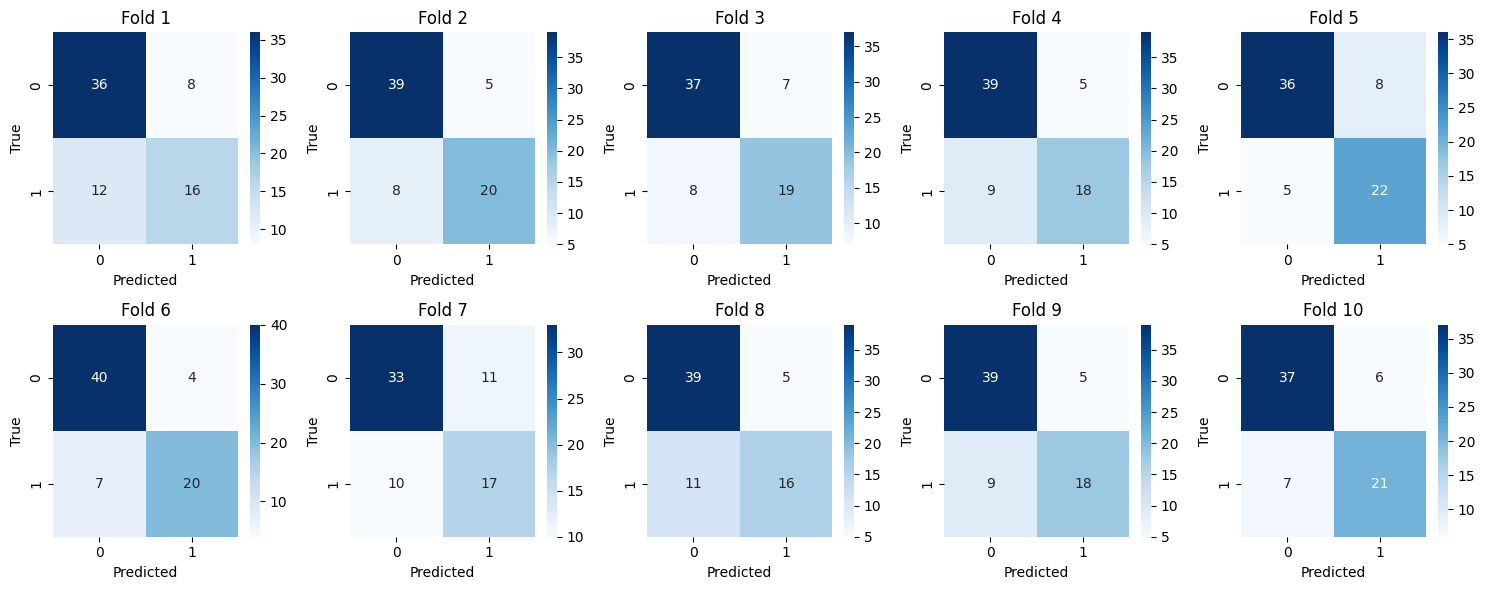

In [13]:
clfnn = RandomizedSearchCV(
    estimator = clf_NeuralNetwork, 
    param_distributions=param_grid_NeuralNetwork,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfnn.fit(train_data, train_labels)

best_params = clfnn.best_params_
print("NeuralNetwork best parameters:", best_params)

f_macro_scores4 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfnn.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores4.append(report["accuracy"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

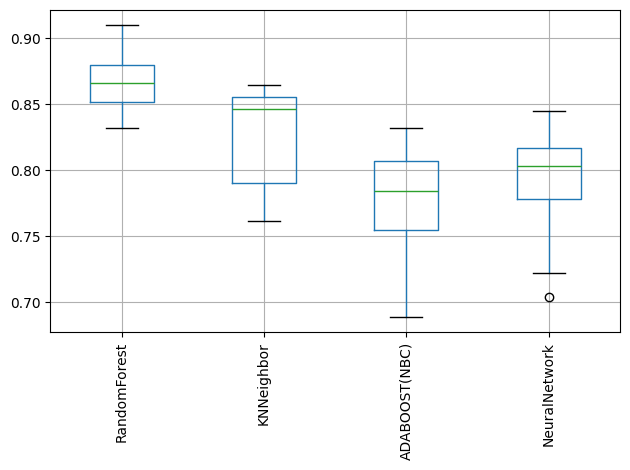

In [14]:
cv_scores = {
    'RandomForest': f_macro_scores1,
    'KNNeighbor': f_macro_scores2,
    'ADABOOST(NBC)': f_macro_scores3,
    'NeuralNetwork': f_macro_scores4,
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.show()